# Import and load data

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import random

In [133]:
data=pd.read_csv("birds.csv")
data.head()

,gender,body_mass,beak_length,beak_depth,fin_length,bird category
0,male,3750,39.1,18.7,181,A
1,female,3800,39.5,17.4,186,A
2,female,3250,40.3,18.0,195,A
3,female,3500,39.6,17.7,186,A
4,female,3450,36.7,19.3,193,A


# Visualization

<Axes: xlabel='fin_length', ylabel='Count'>

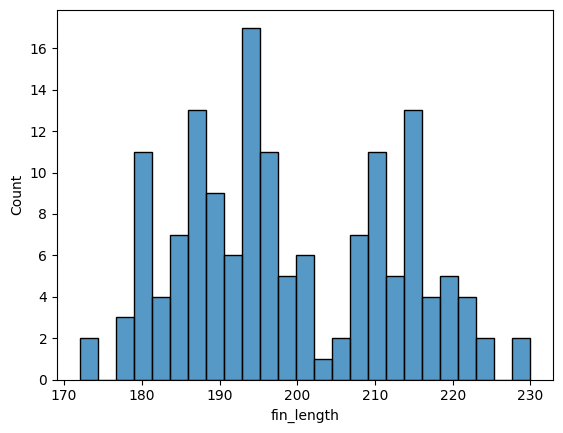

In [134]:
sns.histplot(data['fin_length'],bins=25)

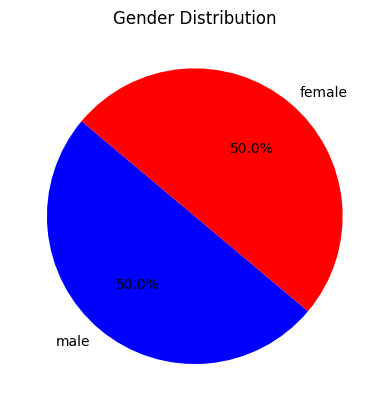

In [135]:
gender_counts = data['gender'].value_counts()
# Plot pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=140)
plt.title('Gender Distribution')
plt.show()

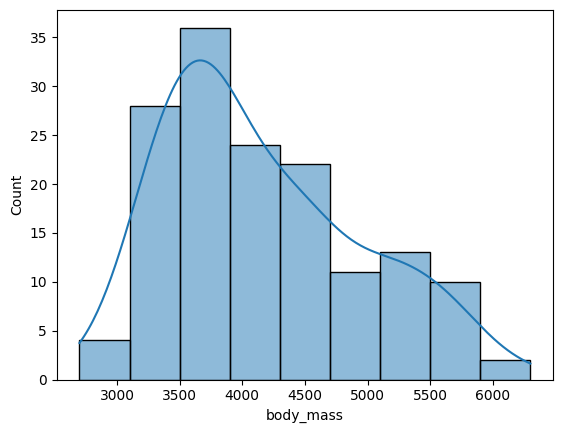

In [136]:
sns.histplot(data['body_mass'],kde=True) # right skewed
plt.show()

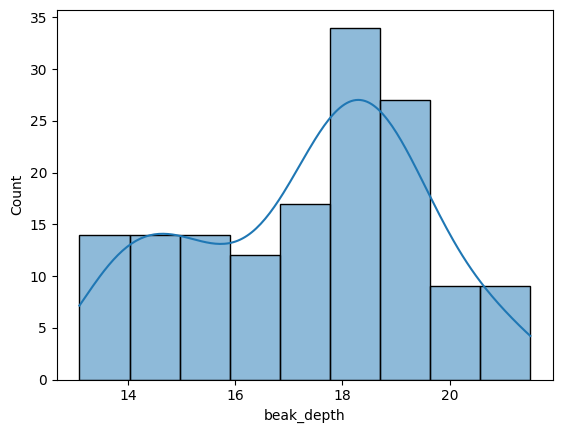

In [137]:
sns.histplot(data['beak_depth'],kde=True) # left skewed
plt.show()

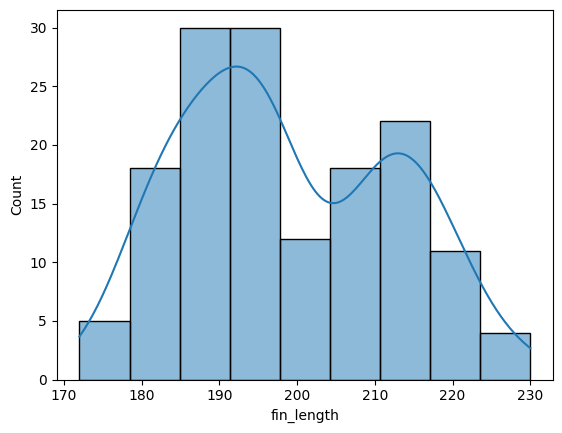

In [138]:
sns.histplot(data['fin_length'],kde=True) 
plt.show()

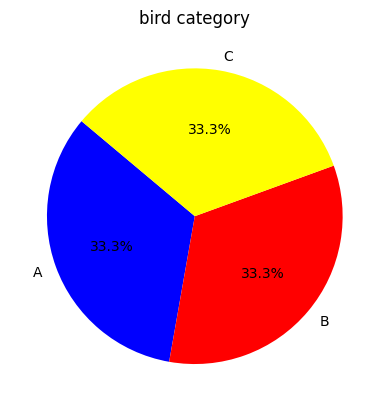

In [139]:
Category_counts = data['bird category'].value_counts()
plt.pie(Category_counts, labels=Category_counts.index, autopct='%1.1f%%', colors=['blue', 'red','yellow'], startangle=140)
plt.title('bird category')
plt.show()

# Preprocessing

### Encode categorical data and replace  null values

In [140]:
data.shape # (150, 6)
#6 nulls in gender , we have to encode the gender and category
# print(data["gender"]==0).sum()#females=77,male=73
data['gender'].isnull().sum()
gender_mapping = {'male': 0, 'female': 1}
data["gender"] = data["gender"].replace(gender_mapping).infer_objects(copy=False)
categories_mapping = {'A': 0, 'B': 1, 'C': 2}
data['bird category'] = data['bird category'].replace(categories_mapping).infer_objects(copy=False)
data["gender"] = data["gender"].bfill() #backkfilling the nulls

C:\Users\Zeina\AppData\Local\Temp\ipykernel_7468\2736689678.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["gender"] = data["gender"].replace(gender_mapping).infer_objects(copy=False)
C:\Users\Zeina\AppData\Local\Temp\ipykernel_7468\2736689678.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['bird category'] = data['bird category'].replace(categories_mapping).infer_objects(copy=False)


### Plotting outliers

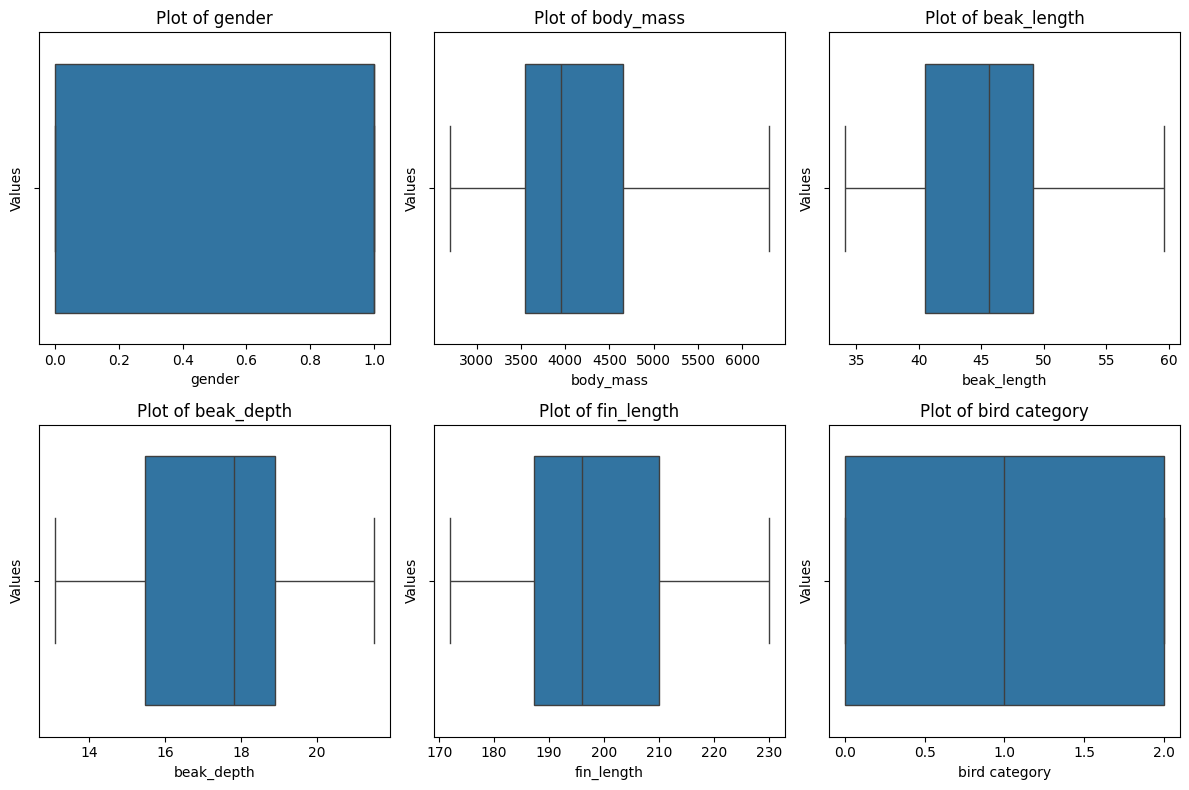

In [141]:
plt.figure(figsize=(12, 8))  # Set figure size
for idx, i in enumerate(data.columns, start=1):
    plt.subplot(2, 3, idx)  # 2 rows, 3 columns
    sns.boxplot(data=data, x=i)
    plt.title(f'Plot of {i}')
    plt.xlabel(i)
    plt.ylabel("Values")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Standard scaler

In [142]:
scaler=StandardScaler() # to preserve the data shape
data_scaled=data.columns[1:-1]
data[data_scaled]=scaler.fit_transform(data[data_scaled])
print(data.head())

   gender  body_mass  beak_length  beak_depth  fin_length  bird category
0     0.0  -0.521831    -1.097692    0.648822   -1.315727              0
1     1.0  -0.458011    -1.021604    0.038203   -0.948616              0
2     1.0  -1.160025    -0.869429    0.320027   -0.287815              0
3     1.0  -0.840928    -1.002582    0.179115   -0.948616              0
4     1.0  -0.904747    -1.554218    0.930646   -0.434660              0


In [143]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['bird category']).values
Y=data['bird category'].values


### Choosing features

In [144]:
# feature1 = "gender"
# feature2 = "body_mass"  
# def choosing_features(data, feature1, feature2):
#     new_df = data[[feature1, feature2]].copy()
#     new_df["bird category"] = data["bird category"]
#     return new_df

# new_df=choosing_features(data,feature1,feature2)

In [145]:
# X=new_df.drop(columns='bird category')
# Y=new_df['bird category']
# X

### Filter classes

In [146]:
def filter_classes(data, class_1, class_2,class_3):
    filtered_data = data[data['bird category'].isin([class_1, class_2,class_3])].reset_index(drop=True)
    class_mapping = {class_1: -1, class_2: 0, class_3: 1}
    filtered_data['bird category'] = filtered_data['bird category'].map(class_mapping)
    
    return filtered_data

### Train test split

In [147]:
# def train_split(selected_features, filtered_data):
#     # Select balanced subset
#     train_data = filtered_data.groupby('bird category', group_keys=False).apply(
#         lambda x: x.sample(n=30, random_state=42)
#     )

#     if 'bird category' not in selected_features:
#         selected_features.append('bird category')
    
#     # Split data
#     test_data = filtered_data[selected_features].drop(train_data.index)
#     X_train = train_data.drop(columns=['bird category'])
#     y_train = train_data['bird category']
#     X_test = test_data.drop(columns=['bird category'])
#     y_test = test_data['bird category']
    
#     print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
#     print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
#     return X_train, y_train, X_test, y_test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)


# Fix label shape mismatch:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# y_train = encoder.fit_transform(y_train.reshape(-1, 1))
# y_test = encoder.transform(y_test.reshape(-1, 1))


# Models

In [148]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

In [ ]:
class MLP:
    def __init__(self, inputSize=5,hiddenLayers=2, neurons=3,outputSize=3, learning_rate=0.01, epochs=1000, Abias=True, activationFn=None):
        self.inputSize = inputSize
        self.hiddenLayers = hiddenLayers
        self.neurons = neurons
        self.outputSize = outputSize
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.Abias = Abias
        self.activationFn = sigmoid if activationFn == "sigmoid" else tanh
        self.actvFnDerivative = sigmoid_derivative if activationFn == "sigmoid" else tanh_derivative
        
        self.bias = [] if self.Abias else None 
        self.weights = []  
        
        self.weights.append(np.random.uniform(0, 0.5, size=(inputSize, neurons[0])))  # input weights initialization
        
        if self.Abias:
            self.bias.append(np.zeros((1, neurons[0])))

        for i in range(1, hiddenLayers):                                # hidden layers weights initialization
                    self.weights.append(np.random.randn(neurons[i-1], neurons[i]) * 0.01)
                    if self.Abias:
                        self.bias.append(np.zeros((1, neurons[i])))
                        
        self.weights.append(np.random.randn(neurons[-1], 3) * 0.01)        # output weights initialization
        if self.Abias:
            self.bias.append(np.zeros((1, 3)))
            
    # forward propagation function code
    def forwardPass(self, X):
        layerOutput = [X]

        for i in range(len(self.weights)):
            X = np.dot(X, self.weights[i])
            if self.Abias:
                X += self.bias[i]
            X = self.activationFn(X)
            layerOutput.append(X)

        return layerOutput
    
    # backward propagation function code
    def backwardPass(self,x,y,outputs):
        error = [outputs[-1] - y]
        for i in range(len(self.weights) - 1, 0, -1):
            errorSignal = np.dot(error[-1], self.weights[i].T) * self.actvFnDerivative(outputs[i])
            error.append(errorSignal)

        error.reverse()  # reversing the layers order

        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * np.dot(outputs[i].T, error[i])
            if self.Abias:
                self.bias[i] -= self.learning_rate * np.sum(error[i], axis=0, keepdims=True)

        
    def train(self, X_train, y_train):
        y_trainEncoded = np.eye(self.outputSize)[y_train]

        for epoch in range(self.epochs):
            outputs = self.forwardPass(X_train)
            self.backwardPass(X_train, y_trainEncoded, outputs)

            if epoch % 50 == 0:
                errorsSquared = np.square(y_trainEncoded - outputs[-1])
                loss = np.mean(np.sum(errorsSquared, axis=1)) 
                
                predicted_labels = np.argmax(outputs[-1], axis=1)
                true_labels = np.argmax(y_trainEncoded, axis=1)
                accuracy = np.mean(predicted_labels == true_labels)
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy*100:.2f}%")

        
        
    def test(self, X_test, y_test):
        y_testEncoded = np.eye(self.outputSize)[y_test]

        for epoch in range(self.epochs):
            outputs = self.forwardPass(X_test)
            self.backwardPass(X_test, y_testEncoded, outputs)

            if epoch % 50 == 0:
                errorsSquared = np.square(y_testEncoded - outputs[-1])
                loss = np.mean(np.sum(errorsSquared, axis=1))
                
                predicted_labels = np.argmax(outputs[-1], axis=1)
                true_labels = np.argmax(y_testEncoded, axis=1)
                accuracy = np.mean(predicted_labels == true_labels)
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy*100:.2f}%")    
                            
    # sample classification
    def predict(self, sample):
        return self.forwardPass(sample)[-1]


In [167]:
model = MLP(inputSize=5,hiddenLayers=2, neurons=[3,4],outputSize=3, learning_rate=0.005, epochs=1000, Abias=True,activationFn='sigmoid')
model.train(X_train, y_train)


Epoch 0, Loss: 0.7502, Accuracy: 34.44%
Epoch 50, Loss: 0.6649, Accuracy: 35.56%
Epoch 100, Loss: 0.6649, Accuracy: 35.56%
Epoch 150, Loss: 0.6648, Accuracy: 35.56%
Epoch 200, Loss: 0.6646, Accuracy: 35.56%
Epoch 250, Loss: 0.6640, Accuracy: 35.56%
Epoch 300, Loss: 0.6625, Accuracy: 35.56%
Epoch 350, Loss: 0.6568, Accuracy: 48.89%
Epoch 400, Loss: 0.6312, Accuracy: 41.11%
Epoch 450, Loss: 0.5348, Accuracy: 74.44%
Epoch 500, Loss: 0.3990, Accuracy: 73.33%
Epoch 550, Loss: 0.3380, Accuracy: 82.22%
Epoch 600, Loss: 0.3204, Accuracy: 91.11%
Epoch 650, Loss: 0.3115, Accuracy: 83.33%
Epoch 700, Loss: 0.2963, Accuracy: 90.00%
Epoch 750, Loss: 0.2491, Accuracy: 98.89%
Epoch 800, Loss: 0.1624, Accuracy: 100.00%
Epoch 850, Loss: 0.0851, Accuracy: 100.00%
Epoch 900, Loss: 0.0434, Accuracy: 100.00%
Epoch 950, Loss: 0.0241, Accuracy: 100.00%


In [168]:
model.test(X_test, y_test)


Epoch 0, Loss: 0.0202, Accuracy: 100.00%
Epoch 50, Loss: 0.0094, Accuracy: 100.00%
Epoch 100, Loss: 0.0069, Accuracy: 100.00%
Epoch 150, Loss: 0.0052, Accuracy: 100.00%
Epoch 200, Loss: 0.0041, Accuracy: 100.00%
Epoch 250, Loss: 0.0033, Accuracy: 100.00%
Epoch 300, Loss: 0.0027, Accuracy: 100.00%
Epoch 350, Loss: 0.0022, Accuracy: 100.00%
Epoch 400, Loss: 0.0019, Accuracy: 100.00%
Epoch 450, Loss: 0.0016, Accuracy: 100.00%
Epoch 500, Loss: 0.0014, Accuracy: 100.00%
Epoch 550, Loss: 0.0012, Accuracy: 100.00%
Epoch 600, Loss: 0.0011, Accuracy: 100.00%
Epoch 650, Loss: 0.0009, Accuracy: 100.00%
Epoch 700, Loss: 0.0008, Accuracy: 100.00%
Epoch 750, Loss: 0.0007, Accuracy: 100.00%
Epoch 800, Loss: 0.0007, Accuracy: 100.00%
Epoch 850, Loss: 0.0006, Accuracy: 100.00%
Epoch 900, Loss: 0.0006, Accuracy: 100.00%
Epoch 950, Loss: 0.0005, Accuracy: 100.00%


In [169]:
test = np.array([[0, -1.19, 0.5, 1.2, -0.3]])
prediction = model.predict(test)
predictedClass = np.argmax(prediction)
print("The class predicted:", predictedClass)

The class predicted: 2
